Assignment 2

In [144]:
from google.colab import files

# Prompt the user to upload a file
fileData = files.upload()

# Get the file name and contents
for filename, contents in fileData.items():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(contents)))


Saving apples.txt to apples (11).txt
Uploaded file "apples (11).txt" with length 3232 bytes


In [145]:
# import pyplot as plt from matplotlib, to be used for plotting
import matplotlib.pyplot as plt

In [146]:
# VectorAdd() performs vector addition on two vectors and returns a
# vector
def VectorAdd(a,b):
    assert len(a)==len(b)
    c = [a[i] + b[i] for i in range(len(a))]
    return c


In [147]:
# VectorSub() performs vector subtraction on two vectors and returns a
# vector
def VectorSub(a,b):
    assert len(a)==len(b)
    c = [a[i] - b[i] for i in range(len(a))]
    return c

In [148]:
# VectorMult() performs vector multiplication and returns a scalar
# (number)
def VectorMult(a,b):
    total = sum(a[i] * b[i] for i in range(len(a)))
    return total

In [149]:

def DrawPointsAndLine(greenlist,redlist,w,title):
    greenXValues=[]
    greenYValues=[]
    redXValues=[]
    redYValues=[]
    # extract green x values and add to greenXValues here
    greenXValues = [point[0] for point in greenlist]
    # extract green y values and add to greenYValues here
    greenYValues = [point[1] for point in greenlist]

    # extract red x values and add to redXValues here
    redXValues = [point[0] for point in redlist]
    # extract red y values and add to redYValues here
    redYValues = [point[1] for point in redlist]

    # what does this do? (1)
    # It plots green points
    plt.plot(greenXValues,greenYValues,'go')
    # what does this do? (2)
    # It plots red points
    plt.plot(redXValues,redYValues,'ro')
    # configure axes lengths
    plt.axis([-5,5,-5,5])
    # what does this do? (3)
    # It adds a grid to the graph, without this line, the graph would not have any grid lines
    plt.grid(True)

    # Get x0 and y0 from the equation w0*x0+w1*y0=0
    x0 = -5
    y0 = (-w[0] * x0) / w[1]
    # Get x1 and y1 from the equation w0*x1+w1*y1=0
    x1 = 5
    y1 = (-w[0] * x1) / w[1]


    # what does this do? (4)
    # It plots the separating line
    plt.plot([x0,x1],[y0,y1])
    # what does this do? (5)
    # It sets the title
    plt.suptitle(title)
    # what does this do? (6)
    # It shows the plot
    plt.show()
    return




In [150]:
# PerceptronLearning learns the weights to be used for a Perceptron
# function
def PerceptronLearning(greenlist,redlist,w):
  max_iterations = 3
  i = 0;
  for x in range(max_iterations):
     wrongclassified = False
     # Iterates over greenlist
     for x in greenlist:
         if VectorMult(w,x)<=0:
          w = VectorAdd(w,x)
          wrongclassified = True
     # Iterates over redlist
     for x in redlist:
         if VectorMult(w,x)>0:
          w = VectorSub(w,x)
          wrongclassified = True
    # If theres no wrong classification, breaks from loop
     if not wrongclassified:
        break
  return w

In [151]:
import random
from sklearn.model_selection import train_test_split
# Load data and split into training/testing
def LoadFile(fileName):
    random.seed(1)

    # Initialises an empty list to store data
    data = []

    # Opens the file
    with open(fileName, 'r') as file:
        # Skips the first line of the file which contains titles
        file.readline()

        # Reads each line in the file
        for line in file:
            # Splits the line into values using space as delimiter
            values = line.split()
            # Extracts features and label from the line
            feature1 = float(values[0])
            feature2 = float(values[1])
            label = int(values[2])
            # Appends the features and label as a tuple to the data list
            data.append((feature1, feature2, label))

    # Splits the data into training and testing sets using train_test_split function with 70% for training and 30% for testing
    training, testing = train_test_split(data, test_size=0.3, random_state=1)

    return training, testing





In [152]:
# return two lists obtained from single list
def Group(applelist):
    # Initialises lists to store class A and class B apples
    classAvectors = []
    classBvectors = []

    for feature1, feature2, label in applelist:
        # Checks if the label is equal to 1, if so then features are appended to class A list
        if label == 1:
            classAvectors.append((feature1, feature2))
        elif label == 0:
        # Features are appended to class B list
            classBvectors.append((feature1, feature2))

    # Returns the lists for class A and class B apples
    return classAvectors, classBvectors


In [153]:
def Evaluate(weight,appleAVectors,appleBVectors):
    # evaluate accuracy based on weights
    validEstimates = 0
    totalEstimates = len(appleAVectors) + len(appleBVectors)

    # Evaluate test set A
    for sample in appleAVectors:
        prediction = sum(sample[i] * weight[i] for i in range(len(sample)))
         # Uses a threshold of zero
        if prediction >= 0:
            validEstimates += 1

    # Evaluate test set B
    for sample in appleBVectors:
        prediction = sum(sample[i] * weight[i] for i in range(len(sample)))
        # Uses a threshold of zero
        if prediction < 0:
            validEstimates += 1

    accuracyscore = (validEstimates / totalEstimates) * 100

    return accuracyscore


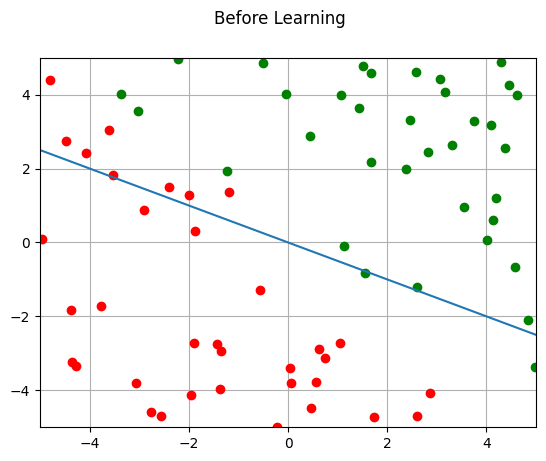

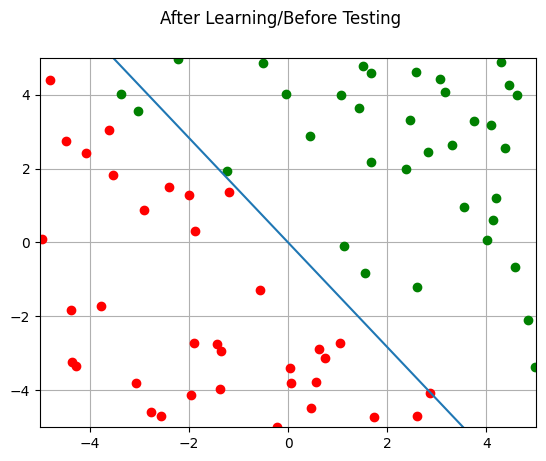

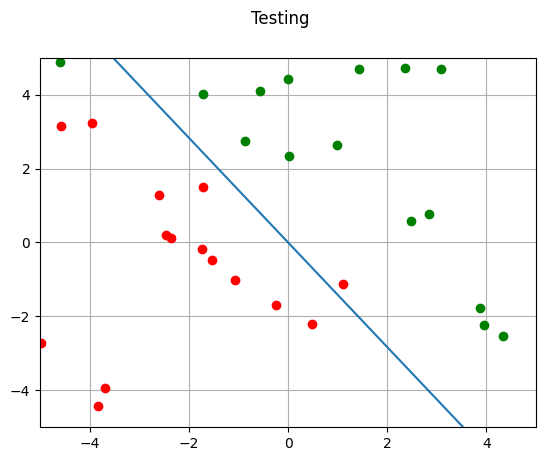

Learned weight vector:  [10.573325393689998, 7.466730890550003]
Accuracy:  83.33333333333334


In [154]:
if __name__ == '__main__':
    w=[0.5,1]
    training,testing=LoadFile("apples.txt")
    trainingA,trainingB=Group(training)
    testingA,testingB=Group(testing)

    # what does this do? (7)
    # Draws the points and the line before the learning algorithm has taken place
    DrawPointsAndLine(trainingA,trainingB,w,"Before Learning")

    # what does this do? (8)
    # Executes the Perceptron Learning algorithm using the training data and the initial weight, and returns the updated weight after the learning process
    weights=PerceptronLearning(trainingA,trainingB,w)

    # what does this do? (9)
    # Firstly, it calls the DrawPointsAndLearn function which shows the points and separating line after learning has occured
    # Then it calls the DrawPointsAndLearn function again and shows the testing data points and the separating line
    # It then prints out the learned weight vector and the accuracy score on the testing data
    DrawPointsAndLine(trainingA,trainingB,weights,"After Learning/Before Testing")
    DrawPointsAndLine(testingA,testingB,weights,"Testing")
    print ("Learned weight vector: ", weights)
    print ("Accuracy: ",Evaluate(w,testingA,testingB))